<a href="https://colab.research.google.com/github/jessystem/analise_covid/blob/main/analise_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise de Dados do COVID-19 - Prova de Data Science (1º Semestre) - FIAP  

Esta análise de dados sobre o COVID-19 utiliza Python para explorar informações relacionadas a casos, óbitos, recuperações e tendências ao longo do tempo, proporcionando insights relevantes sobre a pandemia.
## 📊 Sobre o projeto  
O projeto faz uso de bibliotecas como **Pandas, Matplotlib e Seaborn** para manipulação e visualização de dados. Além disso, emprega técnicas de *machine learning* para prever tendências futuras.  

## 🗂 Dicionário das variáveis  

| Variável    | Descrição |
|------------|-----------|
| **province** | Nome da província ou estado onde os dados foram coletados. |
| **country**  | Nome do país correspondente à província. |
| **Lat**      | Latitude da localização onde os dados foram registrados. |
| **Long**     | Longitude da localização onde os dados foram registrados. |
| **date**     | Data do registro dos casos. |
| **infected** | Número de casos confirmados de COVID-19 no local e data específicos. |
| **dead**     | Número de óbitos registrados devido à COVID-19. |

## 🔧 Tecnologias utilizadas  
- **Python 3.x**  
- **Pandas** – manipulação de dados  
- **Matplotlib & Seaborn** – visualização de dados  
- **Scikit-learn** *(caso aplicável)* – modelos preditivos  


---



###Obtenção dos Dados e carregamento de bibliotecas necessárias

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregar dados

In [40]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [41]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [42]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [43]:
dados_paises_covid.rename(columns={"Province/State": "province",
                                   "Country/Region": "country"},
                          inplace=True)

In [44]:
dados_paises_covid_dead.rename(columns={"Province/State": "province",
                                        "Country/Region": "country"},
                               inplace=True)

In [45]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados


In [46]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                             var_name = 'date',
                                             value_name = 'infected')

In [47]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                                       var_name = 'date',
                                                       value_name = 'dead')

In [48]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [49]:
dados_paises_covid_dead.dtypes

,0
province,object
country,object
Lat,float64
Long,float64
date,object
dead,int64


- Ajustar datas

In [77]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'])


In [78]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'], format='%Y-%m-%d')


In [52]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [54]:
dados_paises_covid_dead.dtypes
#analisando que a data virou DATETIME

,0
province,object
country,object
Lat,float64
Long,float64
date,datetime64[ns]
dead,int64


- Combinar os datasets

In [55]:
dados_paises_covid.shape

(330327, 6)

In [56]:
dados_paises_covid_dead.shape

(330327, 6)

In [57]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead,
                       on = ['province', 'country',	'Lat',	'Long',	'date'],
                       how = 'inner')

#mesclar os dados

In [58]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [59]:
dados_covid.shape

(330327, 7)

In [60]:
dados_covid.columns

Index(['province', 'country', 'Lat', 'Long', 'date', 'infected', 'dead'], dtype='object')

## Questão 1

1 – Quantos países existem no banco de dados?

In [61]:
dados_covid['date'].max()

Timestamp('2023-03-09 00:00:00')

In [62]:
dados_covid['country'],["province"]


(0                  Afghanistan
 1                      Albania
 2                      Algeria
 3                      Andorra
 4                       Angola
                   ...         
 330322      West Bank and Gaza
 330323    Winter Olympics 2022
 330324                   Yemen
 330325                  Zambia
 330326                Zimbabwe
 Name: country, Length: 330327, dtype: object,
 ['province'])

In [63]:
dados_covid["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [64]:
dados_covid["province"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [65]:
# Criando a lista de países e outras entradas
lista = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Korea, North', 'Korea, South', 'Kosovo', 'Kuwait', 'Kyrgyzstan',
       'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'MS Zaandam',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
       'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Namibia', 'Nauru', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
       'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan',
       'Spain', 'Sri Lanka', 'Sudan', 'Summer Olympics 2020', 'Suriname',
       'Sweden', 'Switzerland', 'Syria', 'Taiwan*', 'Tajikistan',
       'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu', 'US',
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Winter Olympics 2022', 'Yemen', 'Zambia',
       'Zimbabwe']

# DataFrame
df = pd.DataFrame(lista, columns=['Nome'])

# Separando para verificar quais não sao paises

provincias_ou_especiais = df[df['Nome'].str.contains('Diamond|MS|Olympics', regex=True)]
paises = df[~df['Nome'].str.contains('Diamond|MS|Olympics', regex=True)]

# Exibindo os resultados
print("Países:")
print(paises)
print("\nProvíncias ou entradas especiais:")
print(provincias_ou_especiais)



Países:
                   Nome
0           Afghanistan
1               Albania
2               Algeria
3               Andorra
4                Angola
..                  ...
195             Vietnam
196  West Bank and Gaza
198               Yemen
199              Zambia
200            Zimbabwe

[197 rows x 1 columns]

Províncias ou entradas especiais:
                     Nome
49       Diamond Princess
107            MS Zaandam
170  Summer Olympics 2020
197  Winter Olympics 2022


R: Quantos países existem no banco de dados?
197 paises

In [66]:
print("Países:")
print(paises)

#RESPOSTA 197 paises

Países:
                   Nome
0           Afghanistan
1               Albania
2               Algeria
3               Andorra
4                Angola
..                  ...
195             Vietnam
196  West Bank and Gaza
198               Yemen
199              Zambia
200            Zimbabwe

[197 rows x 1 columns]


Questão 2 -  Quantos casos de infectados e mortes Brasil, Itália e E.U.A. possuem até o momento?


In [67]:
# Filtrar os países desejados e a data mais recente
paises_desejados = ['Brazil', 'US', 'Italy']
data_final = dados_covid['date'].max()
filtro = dados_covid[
    (dados_covid['country'].isin(paises_desejados)) & (dados_covid['date'] == data_final)
]

# Agrupar e somar os casos de infectados e mortes
total_casos_paises = filtro.groupby('country')[['infected', 'dead']].sum()

# Exibir o resultado
print(total_casos_paises)

          infected     dead
country                    
Brazil    37076053   699276
Italy     25603510   188322
US       103802702  1123836



3- Quais os 10 países que possuem os maiores valores de infectados? E quais os 10 de maiores
mortes?

In [68]:
#Maiores infectados
grupo_infectados = dados_covid.groupby('country')['infected'].sum()
top_10_infectados = grupo_infectados.sort_values(ascending=False).head(10)
print(top_10_infectados)

country
US                53813184406
India             29131119694
Brazil            21182690594
France            16105911886
Germany           13686043720
United Kingdom    12118271679
Russia            10578569842
Italy             10083161678
Turkey             8840742699
Korea, South       8467888968
Name: infected, dtype: int64


In [69]:
#10 maiores mortes
grupo_morte = dados_covid.groupby('country')['dead'].sum()
top_10_mortos = grupo_morte.sort_values(ascending=False).head(10)
print(top_10_mortos)

country
US                713877215
Brazil            488181000
India             364921237
Mexico            241085189
Russia            220983590
Peru              170749849
United Kingdom    160836677
Italy             127936784
France            113410357
Colombia          100671637
Name: dead, dtype: int64


Embora a taxa de mortalidade seja frequentemente vista como uma métrica útil, ela não reflete completamente a complexidade do problema. Há países com baixa capacidade de testagem e regiões onde há maior prevalência de comorbidades, fatores que podem elevar artificialmente as taxas e tornar os dados menos precisos e representativos da realidade.


In [70]:
pais_confirmados = dados_paises_covid.groupby('country').agg({'infected': 'sum'})
paises_por_morte = dados_paises_covid_dead.groupby('country').agg({'dead': 'sum'})
confirmados_ultimo = pais_confirmados['infected']
mortes_ultimo = paises_por_morte['dead']
df_latest = pd.DataFrame({'Confirmed': confirmados_ultimo, 'Deaths': mortes_ultimo})
df_latest['Mortalidade'] = (df_latest['Deaths'] / df_latest['Confirmed']) * 100
print(df_latest)

                      Confirmed   Deaths  Mortalidade
country                                              
Afghanistan           129988469  5421435     4.170705
Albania               185562654  2485380     1.339375
Algeria               182741650  4901275     2.682079
Andorra                24547525   127190     0.518138
Angola                 60025203  1231834     2.052195
...                         ...      ...          ...
West Bank and Gaza    412543696  3754709     0.910136
Winter Olympics 2022     214462        0     0.000000
Yemen                   7879435  1515446    19.232927
Zambia                195953683  2631722     1.343033
Zimbabwe              140385286  3460717     2.465156

[201 rows x 3 columns]


In [71]:
# Ordenar os países pela taxa de mortalidade e selecionar os 10 primeiros
top_10_mortalidade = df_latest.sort_values(by='Mortalidade', ascending=False).head(10)
print(top_10_mortalidade)

               Confirmed     Deaths  Mortalidade
country                                         
Korea, North         300       1800   600.000000
MS Zaandam          9665       2146    22.203828
Yemen            7879435    1515446    19.232927
Sudan           42936981    3180916     7.408336
Peru          2499413018  170749849     6.831598
Mexico        3944108014  241085189     6.112540
Syria           35209217    2062701     5.858412
Egypt          334600873   17248941     5.155079
Somalia         17864013     897718     5.025287
Ecuador        584150381   26441796     4.526539


Gráfico de linhas contendo a evolução do número de infectados do Brasil e Estados
Unidos.


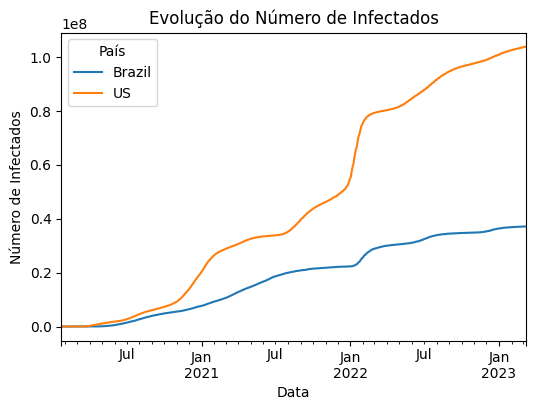

In [72]:
# Filtrar dados para Brasil -Estados Unidos
dados_brasil_eua = dados_covid[(dados_covid["country"] == "Brazil") | (dados_covid["country"] == "US")]

# Agrupar os dados por país, data e somar
dados_agrupados = dados_brasil_eua.groupby(["date", "country"])["infected"].sum().reset_index()

# Agrupar os dados
dados_pivotados = dados_agrupados.pivot(index="date", columns="country", values="infected")

# Criar o gráfico de linha
dados_pivotados.plot(kind="line", figsize=(6, 4))
plt.title('Evolução do Número de Infectados', fontsize=12)
plt.xlabel('Data', fontsize=10)
plt.ylabel('Número de Infectados', fontsize=10)
plt.legend(title="País", fontsize=10)

plt.show()


Gráfico de linhas contendo a evolução do número de mortos do Brasil e Estados Unidos.

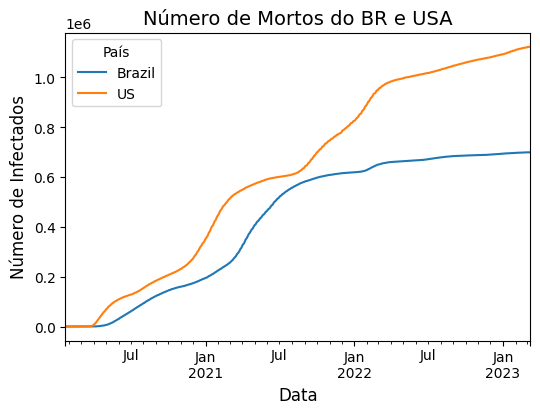

In [73]:
# Filtrar dados para Brasil e Estados Unidos
dados_brasil_eua = dados_covid[(dados_covid["country"] == "Brazil") | (dados_covid["country"] == "US")]

# Agrupar os dados e fazer a soma
dados_agrupados = dados_brasil_eua.groupby(["date", "country"])["dead"].sum().reset_index()

# Agrupar
dados_pivotados = dados_agrupados.pivot(index="date", columns="country", values="dead")

# Criar o gráfico de linha
dados_pivotados.plot(kind="line", figsize=(6,4))
plt.title('Número de Mortos do BR e USA', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Infectados', fontsize=12)
plt.legend(title="País", fontsize=10)

# Exibir o gráfico
plt.show()

Gráfico de barras comparando o número de infectados de Brasil e Estados Unidos em
20/mar.


In [74]:
# Filtrar data
data_marco_20 = dados_covid[
    (dados_covid["date"] == pd.to_datetime("2022-03-20")) &
    (dados_covid["country"].isin(["Brazil"]))
]
#Agrupar os dados
dados_agrupados = data_marco_20.groupby("country")["infected"].sum().reset_index()




Gráfico de barras comparando o número de mortos de Brasil e Estados Unidos em
20/mar.

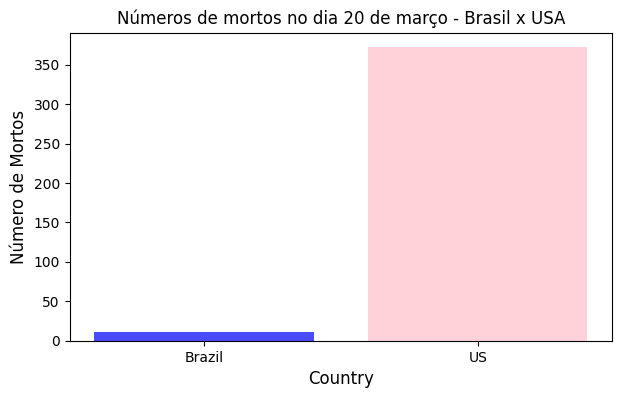

In [75]:
# Filtrr data
data_marco_20 = dados_covid[
    (dados_covid["date"] == pd.to_datetime("2020-03-20")) &
    (dados_covid["country"].isin(["Brazil", "US"]))
]

#Agrupar as mortes
grouped_data = data_marco_20.groupby("country")["dead"].sum().reset_index()

# plotar o grafico
plt.figure(figsize=(7, 4))
plt.bar(grouped_data["country"], grouped_data["dead"], color=["blue", "pink"], alpha=0.7)
plt.title("Números de mortos no dia 20 de março - Brasil x USA", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Número de Mortos", fontsize=12)

plt.show()

Gráfico de barras comparando a taxa de mortalidade de Brasil e Estados Unidos em
20/mar.

<ipython-input-82-43a8d1f10892>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mortality_rates = marco_20_data.groupby("country").apply(


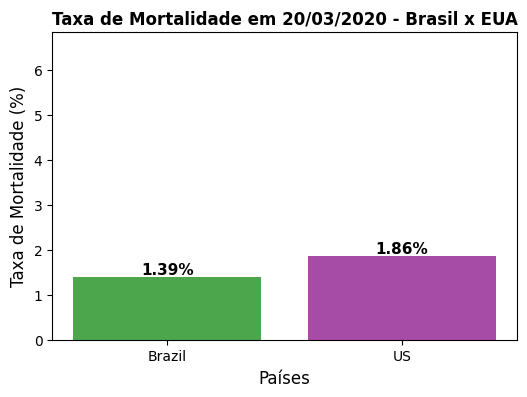

In [82]:
dados_covid["date"] = pd.to_datetime(dados_covid["date"])

# Filtrar dados do dia 20 de março de 2020 para Brasil e EUA
marco_20_data = dados_covid[
    (dados_covid["date"] == pd.to_datetime("2020-03-20")) &
    (dados_covid["country"].isin(["Brazil", "US"]))
]

# Calcular taxa de mortalidade, garantindo que não haja divisão por zero
mortality_rates = marco_20_data.groupby("country").apply(
    lambda x: (x["dead"].sum() / x["infected"].sum() * 100) if x["infected"].sum() > 0 else 0
)

# Criar gráfico de barras
plt.figure(figsize=(6, 4))
bars = plt.bar(mortality_rates.index, mortality_rates.values, color=["green", "purple"], alpha=0.7)

# Adicionar rótulos nas barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2f}%",
             ha="center", va="bottom", fontsize=11, fontweight="bold")

# Ajustar título e rótulos
plt.title("Taxa de Mortalidade em 20/03/2020 - Brasil x EUA", fontsize=12, fontweight="bold")
plt.xlabel("Países", fontsize=12)
plt.ylabel("Taxa de Mortalidade (%)", fontsize=12)
plt.ylim(0, max(mortality_rates.values) + 5)  # Adicionar um pequeno espaço no eixo Y para melhorar visualização

# Exibir o gráfico
plt.show()
